In [1]:
import networkx as nx
import lnetreduce
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#filename = "models/prisme.csv"
filename = "models/flower_4.csv"
timescale = 5
method='odeint'

In [3]:
# loading sif file
#t_filename = "/mnt/c/Datas/Dorothea/e2f1.sif"
t_filename = "/mnt/c/Datas/Dorothea/MYCN.sif"
if os.path.exists(t_filename):
    filename = t_filename
    node_names = []
    edges = []
    with open(filename,'r') as f:
        l = f.readline()[:-1]
        while l:
            prts = l.split('\t')
            sr = prts[0]
            tg = prts[2]
            if not (sr in node_names):
                node_names.append(sr)
            if not (tg in node_names):
                node_names.append(tg)
            edges.append((sr,tg))
            l = f.readline()[:-1]
    print(edges)

    with open(filename[:-4]+'.csv','w') as f:
        f.write('source;target;weight\n')
        for i,e in enumerate(edges):
            f.write(str(e[0])+';'+str(e[1])+';'+str(i)+'\n')

    filename = filename[:-4]+'.csv'
    reduced_filename = "%s_reduced" % filename
    timescale = 5
else:
    print("Skip Dorothea (missing files)")

Skip Dorothea (missing files)


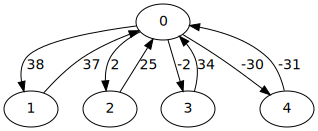

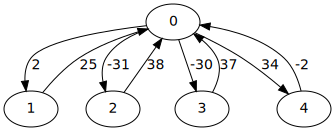

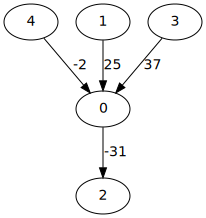

In [4]:
G = lnetreduce.load_graph(filename)

plt.rcParams['figure.dpi']= 100

display( lnetreduce.plot_graph(G) )

while True:
    lnetreduce.reduction.permute_timescales(G)
    try:
        uG = lnetreduce.reduce_graph(G)
    except:
        print("No reduction for these labels")
        continue
    
    display( lnetreduce.plot_graph(G) )
    display( lnetreduce.plot_graph(uG) )
    break
    

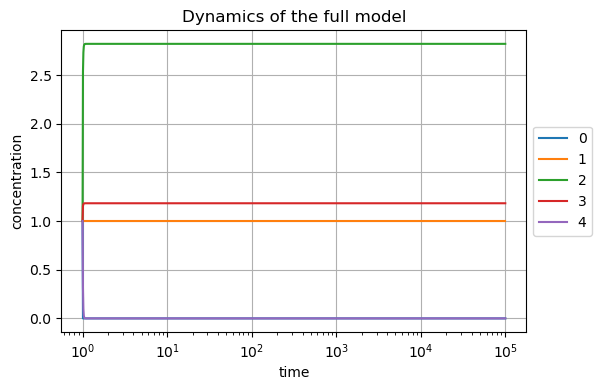

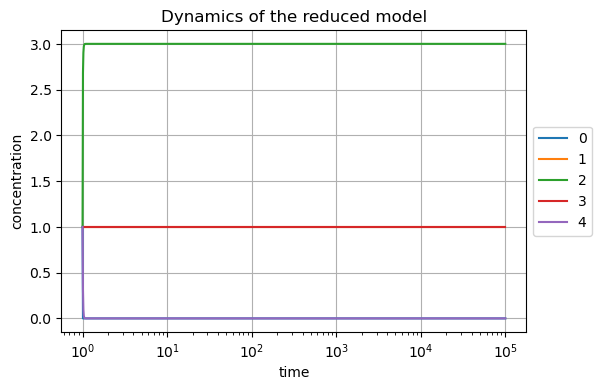

In [5]:
lnetreduce.simulate_and_plot(G,  timescale, title='Dynamics of the full model', method=method)
plt.show()
lnetreduce.simulate_and_plot(uG, timescale, title='Dynamics of the reduced model', method=method)

In [6]:
# generate many permuted graphs
graphs = []
number_of_permutations = 1000
for i in range(number_of_permutations):
    G1 = G.copy()
    lnetreduce.reduction.permute_timescales(G1)
    graphs.append(G1)

In [7]:
# generate a list of unique up to isomorphism graphs

def nm(n1,n2):
    if n1['id']==n2['id']:
        return True
    else:
        return False
    

unique_reduced = []
counts = []
for gr in graphs:
    try:
        ugr = lnetreduce.reduce_graph(gr)
    except:
        print("Error during reduction")
        continue
    node_ids = {}
    for n in ugr.nodes:
        node_ids[n] = n
    nx.set_node_attributes(ugr,node_ids,'id')    
    found = False
    for i,red_gr in enumerate(unique_reduced):
        node_ids = {}
        for n in red_gr.nodes:
            node_ids[n] = n
        nx.set_node_attributes(red_gr,node_ids,'id')
        if nx.is_isomorphic(ugr,red_gr,node_match=nm):
        #if nx.is_isomorphic(ugr,red_gr):
            found = True
            counts[i] = counts[i]+1
    if not found:
        unique_reduced.append(ugr)
        counts.append(1)
print(len(unique_reduced))
print(counts)
total_counts = 0
for c in counts:
    total_counts+=c

Error during reduction
Error during reduction
Error during reduction
Error during reduction
Error during reduction
Error during reduction
Error during reduction
Error during reduction
Error during reduction
Error during reduction
Error during reduction
Error during reduction
Error during reduction
Error during reduction
22
[171, 186, 188, 173, 12, 64, 23, 12, 18, 17, 18, 11, 21, 17, 16, 18, 16, 1, 1, 1, 1, 1]


Number of unique graphs =  22


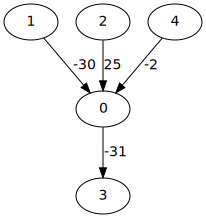

Frequency= 0.19066937119675456


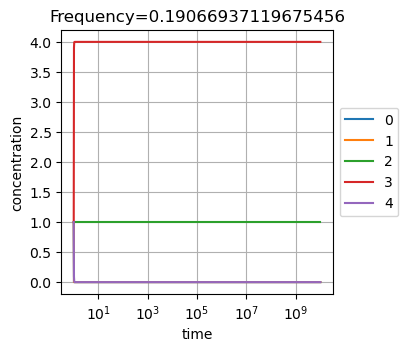

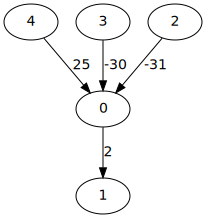

Frequency= 0.18864097363083165


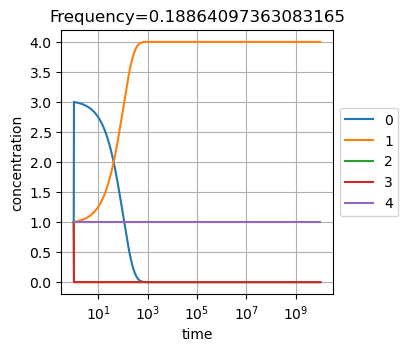

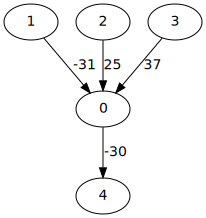

Frequency= 0.17545638945233266


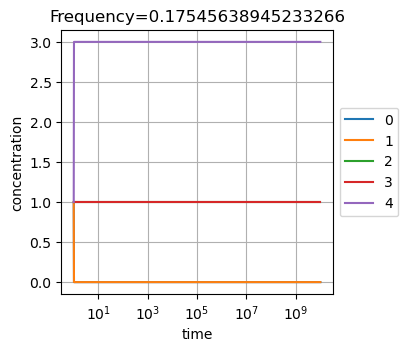

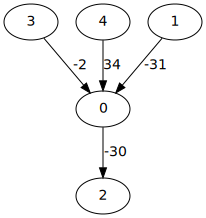

Frequency= 0.17342799188640973


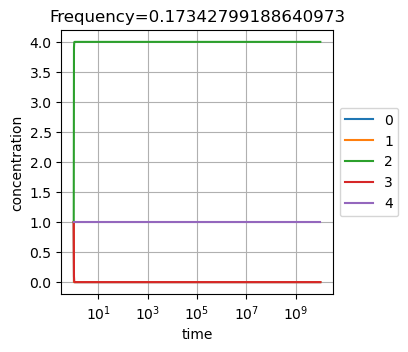

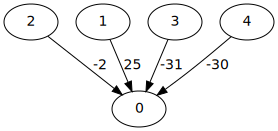

Frequency= 0.06490872210953347


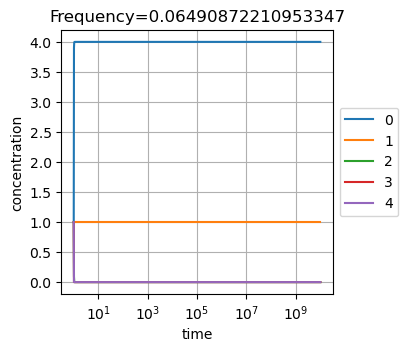

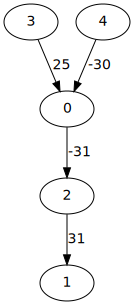

Frequency= 0.02332657200811359


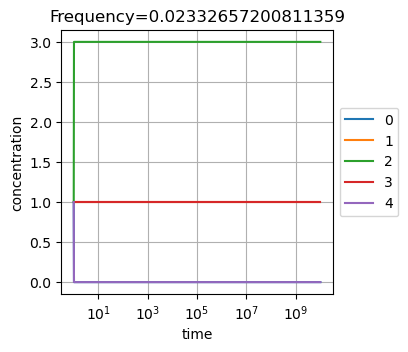

In [8]:
# draw unique graphs
plt.rcParams['figure.dpi']= 100
print('Number of unique graphs = ',len(unique_reduced))


max_number_of_graphs = 5
most_frequent = True
if most_frequent:
    irx = np.argsort(-np.array(counts))
else:
    irx = np.argsort(np.array(counts))
    
do_plot_dynamics = True
    
timescale=10

k = 0
for i in irx:
    ugr = unique_reduced[i]
    plt.figure(figsize=(3.5,3.5))

    display( lnetreduce.plot_graph(ugr) )
    print('Frequency=',counts[i]/total_counts)
    if do_plot_dynamics:
        lnetreduce.simulate_and_plot(ugr,timescale,title='Frequency='+str(counts[i]/total_counts),method=method)
        plt.show()
    k+=1
    if k>max_number_of_graphs:
        break

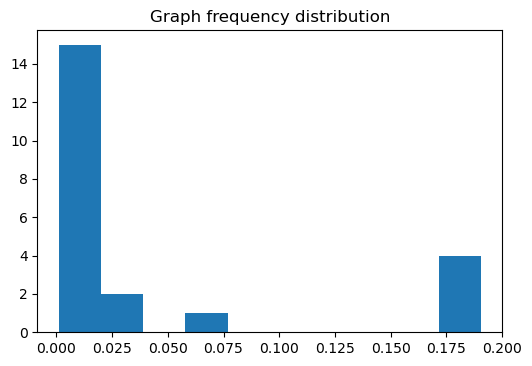

In [9]:
plt.hist(np.array(counts)[irx]/total_counts)
plt.title('Graph frequency distribution')
plt.show()